In [ ]:
#kritk 4
#gradient descent
#choosing a good initial starting point is important so that the algorithm doesn't get stuck somewhere
#to find derivative: take a step backwards and forwards to determine the rate of change
#what is learning rate?
#step = learning rate x negative derivative. example is 0.5*-(-2) =1
#you get very close to zero, but not excactly zero
#learning rate: pick a number between 0 and 1
#if derivative absolute value is <0.1 you are sufficiently close to the minimum
#try plotting the function to see what the minimums are 


Running gradient descent on function 1...


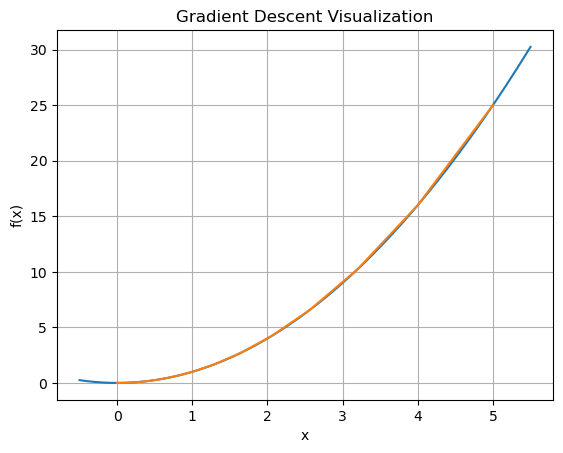

Final Point (x, f(x)) for function 1: (0.0, 0.0)

Running gradient descent on function 2...


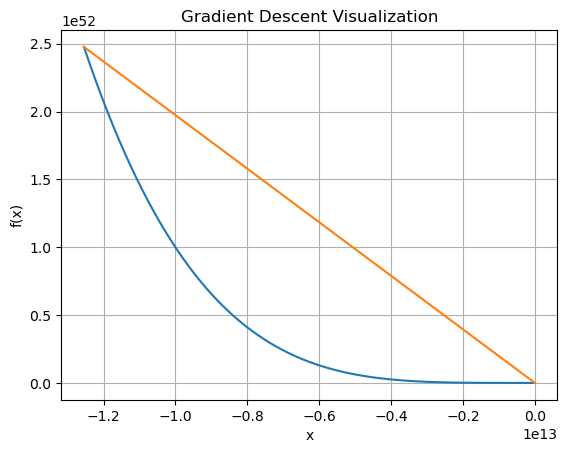

Final Point (x, f(x)) for function 2: (-12543999968256.729, 2.475963151232574e+52)

Running gradient descent on function 3...


OverflowError: (34, 'Numerical result out of range')

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(f, learning_rate, initial_point):
    def deriv(f, base_point): #estimate the derivative
    #of the function f at base_point using the symmetric approx
        return (f(base_point+10**(-10))-f(base_point-10**(-10)))/(2*10**(-10))
        
    x_coords=[initial_point] #This list is where you will store the x_n's
    y_coords=[f(initial_point)] #This list is where you will store the y_n's
    
#PUT YOUR CODE HERE!
    max_steps = 10000  # Setting the step limit
    i = 0  # Start loop variable
    while np.abs(deriv(f, x_coords[i])) > 1e-6 and i < max_steps:  # Convergence and step limit condition
        xi = x_coords[i] - learning_rate * deriv(f, x_coords[i])  #this is the gradient descent step
        x_coords.append(xi)
        y_coords.append(f(xi))
        i += 1  # Increment loop variable

    # Notify if the step limit was reached
    if i == max_steps:
        print("Warning: Reached the maximum number of steps (10,000) without full convergence.")

# Plotting portion. You may adjust as you please.
    plot_range=np.linspace(min(x_coords)-0.5, #a nice plot range
                       max(x_coords)+0.5,10000) #to make look good
    function_range=[f(x) for x in plot_range]
    plt.plot(plot_range, function_range) #this plots the function f(x)
    plt.plot(x_coords, y_coords) #This will plot the
    #sequence of points x_n, f(x_n)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Gradient Descent Visualization")
    plt.grid()
    plt.show()

    return round(x_coords[-1],3), round(y_coords[-1],3) #returns your
# last x_n and y_n, #rounded to three decimal places.

# Define the functions
def first_function(x):
    return x**2 #first function of the question

def second_function(x):
    return x**4 - 2 * x**2

def third_function(x):
    if x>0:
        return x**x
    elif x == 0:
        return 1
    else:
        return abs(x) ** abs(x)

def fourth_function(x):
    return abs(x)

# Parameters for gradient descent
learning_rate = 0.1
initial_point = 5

# Run gradient descent
for idx, func in enumerate([first_function, second_function, third_function, fourth_function], 1):
    print(f"\nRunning gradient descent on function {idx}...")
    result = gradient_descent(func, learning_rate, initial_point)
    print(f"Final Point (x, f(x)) for function {idx}:", result)